# **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
file_dir = '/content/gdrive/My Drive/Segmentation/epidural_images/'

In [ ]:
labels = pd.read_csv('/content/gdrive/My Drive/Segmentation/epidural_images/Results_Epidural.csv')

In [ ]:
labels = labels[labels["Labeling State"].str.contains("Ready") == False]
labels = labels[labels["Labeling State"].str.contains("In Progress") == False]

In [ ]:
labels.columns = labels.columns.str.replace(' ', '')

In [ ]:
labels = labels.loc[labels["CorrectLabel"] != "[[], []]"]

In [ ]:
labels = labels.loc[labels["Origin"] != "ID_20440abc6.jpg"]

In [ ]:
labels = labels.loc[labels["Origin"] != "ID_00178eb80.jpg"]

In [ ]:
labels['CorrectLabel'] = labels['CorrectLabel'].str.replace("'x': ", "", regex=True)
labels['CorrectLabel'] = labels['CorrectLabel'].str.replace("'y': ", "", regex=True)
labels['CorrectLabel'] = labels['CorrectLabel'].str.replace("[", "", regex=True)
labels['CorrectLabel'] = labels['CorrectLabel'].str.replace("]", "", regex=True)


In [ ]:
labels.drop_duplicates(subset="CorrectLabel", keep=False, inplace=True)


In [ ]:
labels.reset_index(inplace = True,drop = True)

In [ ]:
print(labels.shape)
print(labels.Origin)
print(labels.CorrectLabel)

In [ ]:
print(labels.CorrectLabel[0])
print(type(labels.CorrectLabel[0]))

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(labels)

In [ ]:
poly_list=[]

index = 0
for i in labels.CorrectLabel:
  ts = eval(labels.CorrectLabel[index])
  ts = list(ts)
  j = 0
  for i in ts:
    ts[j]= list(i)
    l = ts[j]
    j += 1
    f = 0
    for k in i:
      l[f]= int(l[f] * 512)
      f += 1
  poly_list.append(ts)
  index += 1
  

In [ ]:
os.chdir("/content/gdrive/My Drive/Segmentation/epidural_images/max_contrast_window/")
!ls

In [ ]:
origin_list = []
id_list = []

for i in labels.Origin:
  origin_list.append(i)
  id_list.append(str(i))

print(len(origin_list))
print(origin_list)
print(len(id_list))
print(id_list)

In [ ]:
import shutil
for i in range(len(poly_list)):
  # Source path
  source = "/content/gdrive/My Drive/Segmentation/epidural_images/max_contrast_window/" + origin_list[i]
  
  # Destination path
  destination = "/content/gdrive/My Drive/Segmentation/GoldStdImages/" + origin_list[i]
  
  # Copy the content of
  # source to destination

  try:
      shutil.copy(source, destination)
      print("File copied successfully.")
  
  # If source and destination are same
  except shutil.SameFileError:
      print("Source and destination represents the same file.")
 

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Read an image
for i in range(len(origin_list)):
  print(i)
  print(origin_list[i])
  img = cv2.imread("/content/gdrive/My Drive/Segmentation/epidural_images/max_contrast_window/" + origin_list[i])

  # Define an array of endpoints of polygon
  points = np.array(poly_list[i])
  black = np.array([[0,0], [0,512], [512,512], [512,0]])

  cv2.fillPoly(img, pts=[black], color=(0, 0, 0))
  cv2.fillPoly(img, pts=[points], color=(255, 255, 255))
    
  # Displaying the image
  cv2_imshow(img)

  cv2.imwrite('/content/gdrive/My Drive/Segmentation/Masks/' + origin_list[i] , img)


In [ ]:
from PIL import Image
for i in range(len(origin_list)):
  print(i)
  print(origin_list[i])
  #read the image
  color_image = Image.open('/content/gdrive/My Drive/Segmentation/Masks/' + origin_list[i])
  
  bw = color_image.convert('1', dither=Image.NONE)
  
  #save the image with name "BW_image.jpg"
  bw.save('/content/gdrive/My Drive/Segmentation/MasksBW/' + origin_list[i])

**Verification**

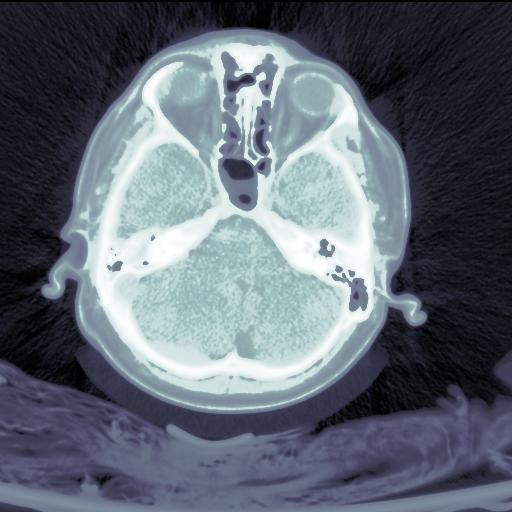

In [ ]:
img_show = cv2.imread("/content/gdrive/My Drive/Segmentation/GoldStdImages/" + origin_list[7])
cv2_imshow(img_show)

In [ ]:
os.chdir("/content/gdrive/My Drive/Segmentation/GoldStdImages/")
!ls

In [ ]:
os.chdir("/content/gdrive/My Drive/Segmentation/Masks/")
!ls